# **1. Introdução**
Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar decisões.

A taxa de retenção de clientes é um bom indicativo de qualidade do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn.

Mas quais são as características que leva um cliente a dar o Churn?

Uma das maneiras que podemos diminuir o Churn é prever quais clientes têm mais risco de evasão. Assim, conseguimos tomar medidas preventivas.

Modelos de Machine Learning são técnicas poderosa para esse fim, ao utilizar essa ferramenta, você poderá descobrir com facilidade aqueles clientes que têm um risco maior de Churn.

Nesse artigo iremos fazer uma  análise do conjunto de dados de uma agência bancária.

Iremos mostrar o passo a passo da implementação de modelos de Machine Learning para prever o Churn.

## **2. Importando o Conjunto de Dados**

In [1]:
# Importa a biblioteca pandas, usada para manipulação de dados
import pandas as pd

In [3]:
# Define a URL do dataset de churn disponível no GitHub
url = "https://raw.githubusercontent.com/lancelot-rodrigues/Arvore_Churn/main/Churn_Modelling.csv"

In [4]:
# Carrega o dataset de churn de clientes a partir de um arquivo CSV
df = pd.read_csv(url)

In [5]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


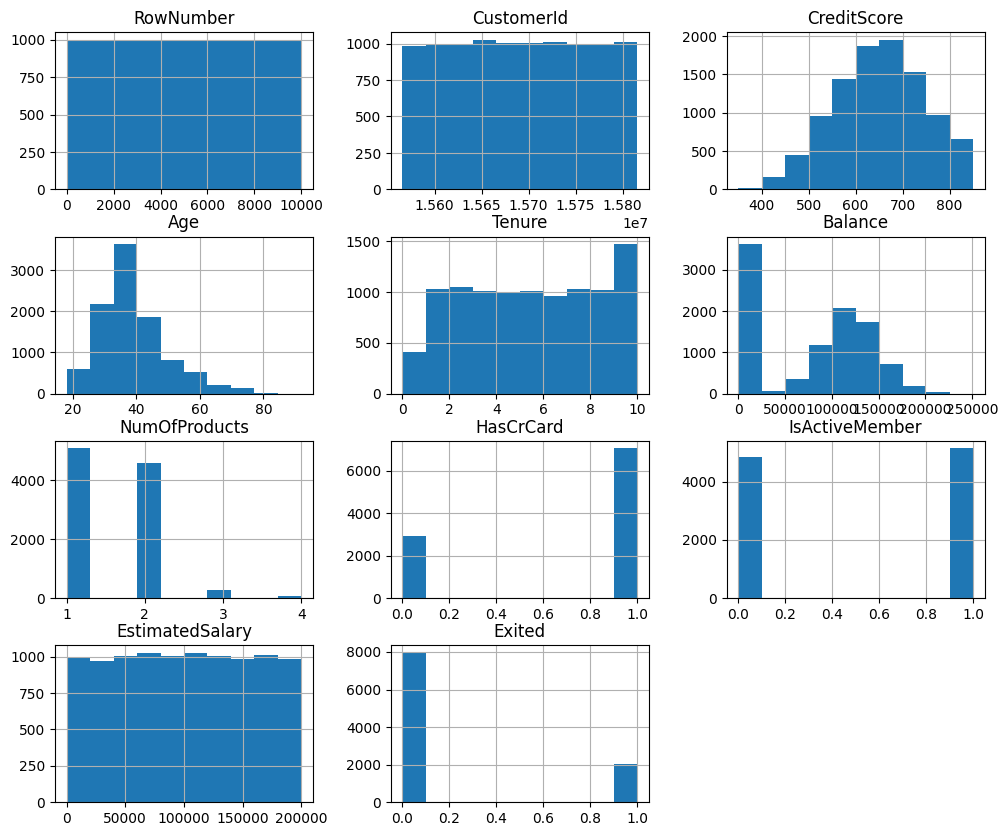

In [9]:
df.hist(figsize=(12,10));


In [10]:
df['Exited_cat']=df['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']



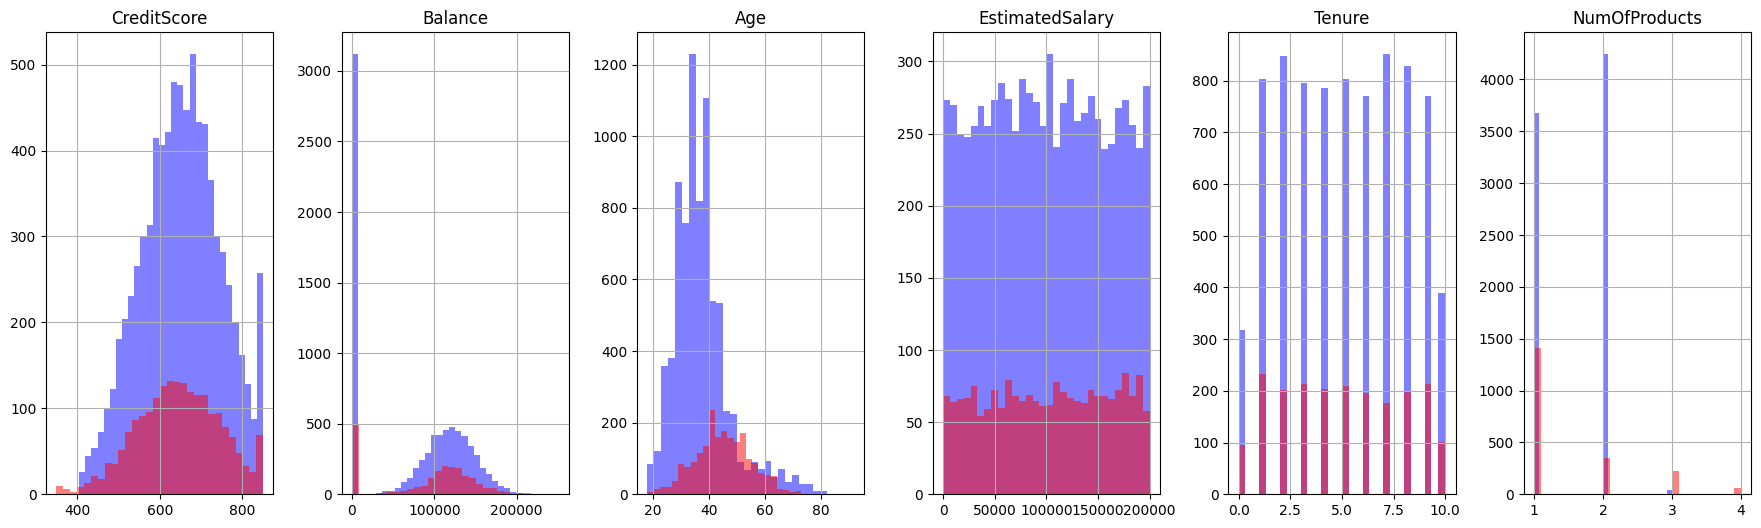

In [11]:
import matplotlib.pyplot as plt#visualização de dados;
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
df[df.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df[df.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

In [12]:

df = df.drop(columns = ['RowNumber','CustomerId','Surname',"Exited_cat"])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})


In [14]:
df1 = pd.get_dummies(data = df , columns = ["Geography"] )

In [15]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  bool   
 11  Geography_Germany  10000 non-null  bool   
 12  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2), int64(8)
memory usage: 810.7 KB


## **VALIDAÇÃO HOLD _OUT**

In [17]:
X  = df1.drop(columns = ["Exited"])

In [18]:
y = df1["Exited"]

In [19]:
#hold out
from sklearn.model_selection import train_test_split

xtreino, xteste , ytreino, yteste = train_test_split(X , y , test_size = 0.25, random_state = 45)

## **AJUSTE DO MODELO DE ARVORE DE DECISÃO**

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [21]:
# Inicializar e ajustar o classificador da árvore de decisão
arvore = DecisionTreeClassifier(max_depth = 4)
arvore.fit(xtreino, ytreino)


DecisionTreeClassifier(max_depth=4)

In [22]:

# Fazer previsões no conjunto de teste
y_pred = arvore.predict(xteste)

In [23]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
conf_matrix = confusion_matrix(yteste, y_pred)

In [26]:
print("Matriz de Confusão:")


print(conf_matrix)

#​
##[[TN FP] [FN TP]]​

Matriz de Confusão:
[[1910   78]
 [ 302  210]]


In [27]:
from sklearn.metrics import accuracy_score


In [28]:
xteste.shape

(2500, 12)

In [29]:
(1910+210)/(2500)

0.848

In [30]:
acuracia = accuracy_score (yteste, y_pred)

acuracia

0.848

In [31]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia do modelo
accuracy = accuracy_score(yteste, y_pred)
print("Acurácia da árvore de decisão:", accuracy)

Acurácia da árvore de decisão: 0.848


In [32]:
from sklearn.metrics import confusion_matrix
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(yteste, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)

##[[TN FP] [FN TP]]

Matriz de Confusão:
[[1910   78]
 [ 302  210]]


In [33]:
from sklearn.metrics import f1_score


In [34]:
f1 = f1_score(yteste, y_pred)
print(f1)

0.525


In [35]:
from sklearn.metrics import precision_score, recall_score
# Calcular a precisão (precision)
precision = precision_score(yteste, y_pred)

# Calcular o recall
recall = recall_score(yteste, y_pred)

print("Precisão (Precision):", precision)
print("Recall:", recall)

Precisão (Precision): 0.7291666666666666
Recall: 0.41015625


## Visualizando a árvore de decisão

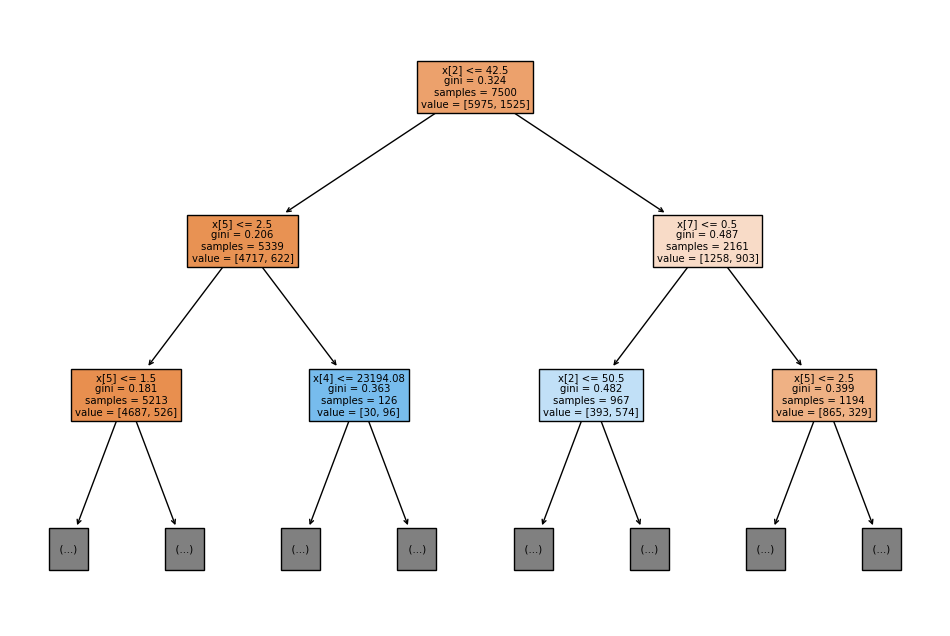

In [36]:
# Plotar uma parte específica da árvore de decisão
plt.figure(figsize=(12, 8))
tree.plot_tree(arvore, filled=True, max_depth=2)  # Defina max_depth para limitar a profundidade da árvore exibida
plt.show()

In [37]:
# Exportando a arvore como texto
texto = tree.export_text(arvore)
print(texto)

|--- feature_2 <= 42.50
|   |--- feature_5 <= 2.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_10 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  1.50
|   |   |   |--- feature_4 <= 1884.34
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  1884.34
|   |   |   |   |--- class: 0
|   |--- feature_5 >  2.50
|   |   |--- feature_4 <= 23194.08
|   |   |   |--- feature_8 <= 66034.86
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  66034.86
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  23194.08
|   |   |   |--- feature_8 <= 195589.29
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  195589.29
|   |   |   |   |--- class: 0
|--- feature_2 >  42.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_2 <= 50.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  50.50

In [42]:
# inserção manual dos dados do cliente e previsão de churn

# Importa bibliotecas necessárias
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Exemplo de modelo que poderia estar sendo usado

# Simulação do modelo treinado para fins ilustrativos
model = RandomForestClassifier()

# Dados de exemplo para treinamento do modelo com 8 features, simulando a situação real
X_train = np.random.rand(100, 8)  # Exemplo de dados de entrada para treinamento com 8 features
y_train = np.random.randint(0, 2, 100)  # Exemplo de rótulos (0 ou 1)
model.fit(X_train, y_train)  # Treina o modelo (apenas como exemplo, deve-se usar o modelo real)

# Escalador de dados ajustado para 8 features (deve ser o mesmo usado no treinamento do modelo)
scaler = StandardScaler()
scaler.fit(X_train)  # Ajusta o escalador aos dados de treinamento com 8 features

# Solicita entrada de dados do cliente
print("Insira os dados do cliente para prever o risco de churn:")

# Coleta de entradas com base nas 8 features do modelo
credit_score = float(input("Informe o Credit Score do cliente: "))
age = float(input("Informe a Idade do cliente: "))
tenure = float(input("Informe o tempo de permanência (em anos): "))
balance = float(input("Informe o saldo do cliente: "))
num_products = float(input("Informe o número de produtos que o cliente utiliza: "))
has_cr_card = int(input("O cliente possui cartão de crédito? (1 para Sim, 0 para Não): "))
is_active_member = int(input("O cliente é um membro ativo? (1 para Sim, 0 para Não): "))
estimated_salary = float(input("Informe o salário estimado do cliente: "))

# Coletando os dados de entrada em um array
manual_data = np.array([[credit_score, age, tenure, balance, num_products, has_cr_card, is_active_member, estimated_salary]])

# Aplicando escalonamento dos dados conforme o modelo treinado
manual_data_scaled = scaler.transform(manual_data)

# Realiza a previsão com o modelo treinado
churn_probability = model.predict_proba(manual_data_scaled)[0][1]  # Pega a probabilidade de churn (classe 1)

# Exibe a probabilidade de churn
print(f"A probabilidade de churn para o cliente é: {churn_probability * 100:.2f}%")


Insira os dados do cliente para prever o risco de churn:
Informe o Credit Score do cliente: 619
Informe a Idade do cliente: 42
Informe o tempo de permanência (em anos): 2
Informe o saldo do cliente: 0
Informe o número de produtos que o cliente utiliza: 1
O cliente possui cartão de crédito? (1 para Sim, 0 para Não): 1
O cliente é um membro ativo? (1 para Sim, 0 para Não): 1
Informe o salário estimado do cliente: 101348.88
A probabilidade de churn para o cliente é: 44.00%


CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary

619,42,2,0,1,1,1,101348.88